<a href="https://colab.research.google.com/github/NirvanaDogra/DataViz/blob/main/IS445_Dogra_Nirvana_Peers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**•What is the "name" of the dataset?**

Stop Sheet results from the City of Urbana, since the Stop Sheet collection began in 2016. Not all Stop Sheets are submitted to the Illinois Department of Transportation (IDOT), so there is a field that indicates if the record is one that would be sent to the State.

**•Where did you obtain it?**

| Field | Value |
| --- | --- |
| Author | Webmaster |
| Maintainer | Webmaster |
| Last Updated | December 27, 2019, 11:11 AM (UTC-06:00) |
| Created | August 21, 2018, 3:59 PM (UTC-05:00) |


**•Where can we obtain it? (i.e., URL)**

https://data.illinois.gov/dataset/stop-sheets

**•What is the license of the dataset? What are we allowed to do with it?**

Public Domain

**•How big is it in file size and in items?**

| Field | Value |
| --- | --- |
| Number of records | 5271 records |
| File Size | 3MB |


1. 'STOP DATE' and 'STOP TIME' refer to the date and time when the police stopped the individual.
2. 'SENT TO STATE' refers to whether the incident was reported to the state authorities or not.
3. 'GEO CODE' is likely a geographic code or location identifier for the area where the stop occurred.
4. 'ANONYMOUS HOUSE NUMBER', 'ADDRESS STREET', and 'CROSS STREET' provide information on the location of the stop.
'RACE DESCRIPTION', 'SEX DESCRIPTION', 'AGE IN YEARS (at time of contact)', and 'RESIDENCY CODE' are details about the person who was stopped.
5. 'PAT-DOWN FRISK CONDUCTED' indicates whether the police conducted a pat-down search on the individual.
6. 'SEARCH CONDUCTED' indicates whether a more extensive search was conducted, possibly including the individual's belongings or vehicle.
7. 'CITATION ISSUED' and 'ARREST MADE' indicate whether the police took any action against the individual after the stop.
8. The various 'REASON FOR STOP' and 'REASON FOR FRISK' categories provide more detailed information about the circumstances and justification for the stop and any subsequent frisk. These reasons may include radio broadcast communication of a potential crime or suspicious activity, fitting a suspect description, casing or observing suspicious behavior, proximity to a crime or high crime area, or suspicion of gang activity or drug transactions.

9. 'FRISK CONDUCTED BY' and 'SEARCH CONDUCTED BY' categories indicate which officer or officers conducted the pat-down or search.

10.  'REASON FOR SEARCH' categories describe the justification for any more extensive search beyond a pat-down, which may include suspicion of drugs, hard objects, firearms, or other weapons. 
11. 'CONTRABAND FOUND' categories document any illegal or prohibited items discovered during the search, such as drugs, drug paraphernalia, alcohol, weapons, or stolen property.

12. 'MAPPING ADDRESS' category refer to the address or location of the incident, possibly for mapping or data analysis purposes.


In [4]:
from IPython.display import HTML
HTML('<iframe width="1000" height="400" src="https://data.illinois.gov/dataset/stop-sheets/resource/39f7ce1d-1e8f-425a-beeb-0d4e78e0b6b7/view/452fde64-d83e-4636-803b-0f8a947f281c" frameborder="0"></iframe>')


/usr/local/lib/python3.9/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
import pandas as pd

In [6]:
!curl -o file.csv https://data.illinois.gov/dataset/66549e2b-0a6b-4a3d-8f34-3fca38fb7d5f/resource/39f7ce1d-1e8f-425a-beeb-0d4e78e0b6b7/download/idot_stop_sheet_output_20191226_114521.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2927k    0 2927k    0     0  1686k      0 --:--:--  0:00:01 --:--:-- 1685k


I created this file to generate latitude and longitude coordinates, and I am now in the process of downloading it from my drive.

In [18]:
!curl -L -o helper.csv "https://drive.google.com/uc?export=download&id=1eAwrNi0DlIumEqNl0jqNVPtHZZVwR1ob"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  182k  100  182k    0     0   341k      0 --:--:-- --:--:-- --:--:--  341k


In [19]:
df = pd.read_csv('./file.csv')

In [20]:
import pandas as pd

In [21]:
# pd.to_datetime(df['STOP TIME'], format='%HH:%MM')
df['date'] = pd.to_datetime(df['STOP DATE'])
df['year'] = df['date'].dt.year
df['STOP TIME'] = df['STOP TIME'].replace('24:00', '00:00')
df['time'] = pd.to_datetime(df['STOP TIME'], format='%H:%M').dt.strftime('%H:%M')


In [22]:
import matplotlib.pyplot as plt

In [23]:
x = []
y = []
for yr in df['year'].unique():
  group = df[df['year'] == yr]
  x.append(str(yr))
  y.append(len(group))


In the chart below, it is evident that the total number of incidents has consistently decreased over the years. Additionally, the data shows that males have consistently been responsible for a greater number of incidents each year, as compared to women.

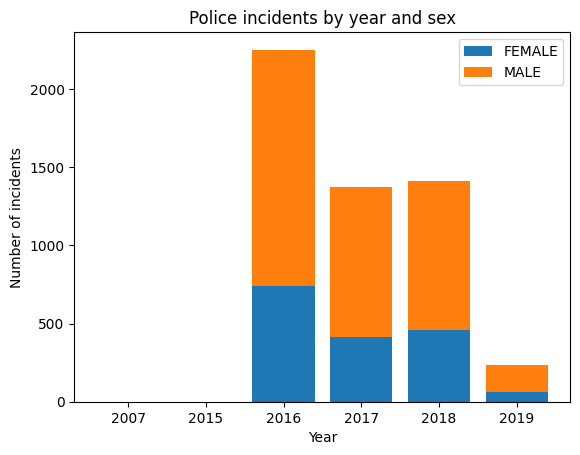

In [24]:
import matplotlib.pyplot as plt
groups = df.groupby(['year', 'SEX DESCRIPTION']).size().unstack(fill_value=0)
x = groups.index.astype(str)

for i, sex in enumerate(groups.columns):
    plt.bar(x, groups[sex], bottom=groups.iloc[:,:i].sum(axis=1), label=sex)

plt.title("Police incidents by year and sex")
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.legend()
plt.show()

The graph clearly illustrates that in 2016, individuals belonging to Black or African American, Hispanic or Latino, as well as White communities had the highest incidence of crime. However, it is encouraging to note that since then, the number of reported crimes has significantly decreased to less than 500.

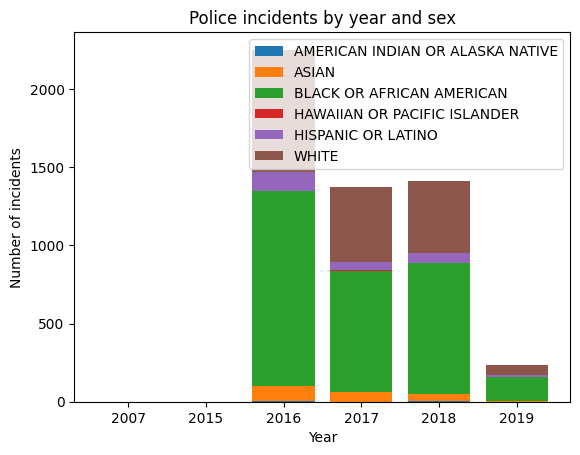

In [25]:
import matplotlib.pyplot as plt
groups = df.groupby(['year', 'RACE DESCRIPTION']).size().unstack(fill_value=0)
x = groups.index.astype(str)

for i, sex in enumerate(groups.columns):
    plt.bar(x, groups[sex], bottom=groups.iloc[:,:i].sum(axis=1), label=sex)

plt.title("Police incidents by year and sex")
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.legend()
plt.show()

In [26]:
helper = pd.read_csv("helper.csv")

In [32]:
group_df = helper.groupby(['MAPPING ADDRESS', 'Latitude',	'Longitude']).size().reset_index()

Based on the graph, it is apparent that the area around 100 W Park has been a hotspot for incidents, with approximately 47 reported over the years.

Furthermore, the location closest to the main guard and with the highest number of incidents is 1 Nevada Urbana.

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scattermapbox(
      lat=group_df['Latitude'],
      lon=group_df['Longitude'],
      mode='markers',
      marker=go.scattermapbox.Marker(
          size=group_df[0],
          sizemin = 3,
          color='red'
      ),
      hovertext= 'Location: '+ group_df['MAPPING ADDRESS'] + '<br>' + 'Number of incident: '+group_df[0].astype(str),
      hoverinfo='text',
      name = "Incidents"
      ),
   
)


fig.add_trace(
    go.Scattermapbox(
      lat=[40.108095604198695],
      lon=[-88.227231],
      mode='markers',
      marker=go.scattermapbox.Marker(
          size=20,
          color='green'
      ),
      hovertext=['Main Quard'],
      hoverinfo='text',
      name = "Main Quard"
      )
   
)

fig.update_layout(
    mapbox_center=go.layout.mapbox.Center(
        lat=group_df['Latitude'].iloc[0],
        lon=group_df['Longitude'].iloc[0]
    ),
    mapbox_style='open-street-map',
    mapbox_zoom=12,
    margin=dict(l=0, r=0, t=0, b=0)
)

fig.show()
